# Project: Investigate a Dataset - [TMDB Movie Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Through this project, we'll look into the **TMDB** movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Attributes in **TMDB** dataset:
> - ID
> - IMDB ID
> - Popularity
> - Budget
> - Revenue
> - Original Title
> - Cast
> - Homepage
> - Director
> - Tagline
> - Keywords
> - Overview
> - Runtime
> - Genres
> - Production Companies
> - Release Date
> - Vote Count
> - Vote Average
> - Release Year
> - Budget Adjustment
> - Revenue Adjustment

### Question(s) for Analysis

> - Which genres generating the highest revenues?
> - Have the number of movies produced annually changed from year to year?  -Have the average runtime of movies changed from year to year?
> - Does the runtime affect the vote average?

First things first, we need to import the necessary libraries for our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Let's load our data and read it into a pandas DataFrame:

In [3]:
movies = pd.read_csv('tmdb-movies.csv', index_col='id')

movies.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
movies.tail(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Examine the shape of our data:

In [5]:
movies.shape

(10866, 20)

> Our data consists of 10866 rows (movies) and 21 columns (features).

Check the datatypes of our data 

In [6]:
movies.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Here are some summary statistics to understand our data a bit more.

In [7]:
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> The previous data shows that our dataset contains movies whose budget, revenue and runtime have a zero value.

Check for any duplicate values:

In [8]:
movies.duplicated().sum()

1

> We have only 1 duplicated row.

Check the features with missing values.

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

> List issues found so far:
> - One duplicated row.
> - Nine features (IMDB Id, Cast, Homepage, Director, Tagline, Keywords, Overview, Genres, Production Companies) with missing values.
> - Some movies have a zero value for budget, revenue and runtime.

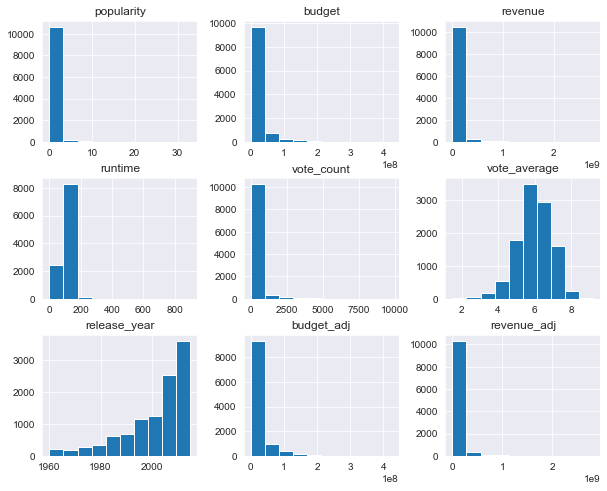

In [10]:
movies.hist(figsize= (10, 8));

### Data Cleaning

> Through our **data cleaning** process, we'll need to:
> - Drop unescessary columns.
> - Remove duplicated rows.
> - Replace movies, whose budget, revenue and runtime have a zero value, with the mean of each.
> - Drop rows with missing values.

Let's start cleaning by dropping unescessary columns which are not required for our analysis.

In [11]:
movies.drop(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count'], axis=1, inplace=True)

In [12]:
movies.head()

,imdb_id,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,
135397,tt0369610,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


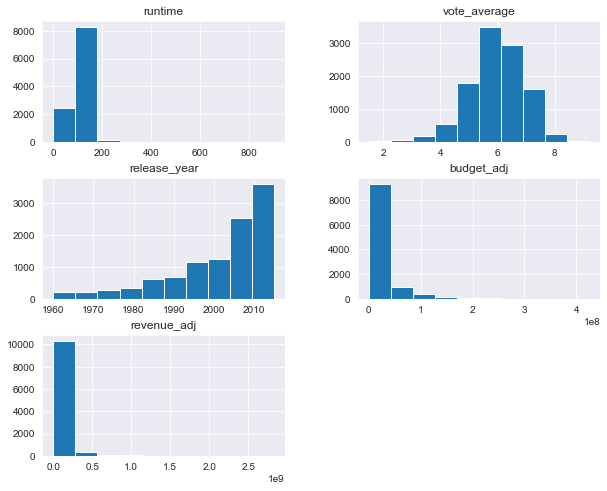

In [13]:
movies.hist(figsize=(10, 8));

Remove duplicated rows:

In [14]:
movies.drop_duplicates(inplace=True)

> Now, let's check the number of duplicates again to confirm dedupe - should be 0

In [15]:
movies.duplicated().sum()

0

Replace movies, whose budget, revenue and runtime have a zero value, with the mean of each. We can do this by finding the mean of budget and revenue adjustments, and then replace the zero values with it by using the **replace()** function

> Let's see some samples of the zero values in budget and revenue we want to replace, and then replace it.

In [16]:
movies.tail(3)

,imdb_id,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,
39768,tt0060161,94,Mystery|Comedy,6.5,1966,0.000000,0.0
21449,tt0061177,80,Action|Comedy,5.4,1966,0.000000,0.0
22293,tt0060666,74,Horror,1.5,1966,127642.279154,0.0


In [17]:
budget_mean = movies['budget_adj'].mean()
budget_mean

17549894.037320614

In [18]:
movies['budget_adj'] = movies['budget_adj'].replace(0, budget_mean)

In [19]:
revenue_mean = movies['revenue_adj'].mean()
revenue_mean

51369001.75884257

In [20]:
movies['revenue_adj'] = movies['revenue_adj'].replace(0, revenue_mean)

Now, let's check the samples again to confirm cleaning

In [21]:
movies.tail(3)

,imdb_id,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,
39768,tt0060161,94,Mystery|Comedy,6.5,1966,1.754989e+07,5.136900e+07
21449,tt0061177,80,Action|Comedy,5.4,1966,1.754989e+07,5.136900e+07
22293,tt0060666,74,Horror,1.5,1966,1.276423e+05,5.136900e+07


> Let's see some samples of the zero values in runtime we want to replace, and then replace it.

In [22]:
movies.loc[[370687, 361931], :]

,imdb_id,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,
370687,tt3608646,0,Fantasy|Action|Adventure,5.4,2015,1.754989e+07,5.136900e+07
361931,tt5065822,0,Documentary,6.5,2015,1.754989e+07,5.136900e+07


In [23]:
runtime_mean = movies['runtime'].mean()
runtime_mean

102.07179015186378

In [24]:
movies['runtime'] = movies['runtime'].replace(0, runtime_mean)

Now, let's check the samples again to confirm cleaning

In [25]:
movies.loc[[370687, 361931], :]

,imdb_id,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,
370687,tt3608646,102.07179,Fantasy|Action|Adventure,5.4,2015,1.754989e+07,5.136900e+07
361931,tt5065822,102.07179,Documentary,6.5,2015,1.754989e+07,5.136900e+07


Drop rows with missing values by using **dropna()**:

In [26]:
movies.dropna(inplace=True)

> Check if any feature has null values - should print False

In [27]:
movies.isnull().sum().any()

False

Let's check our summary statistics after cleaning data.

In [28]:
movies.describe()

,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04
mean,102.445371,5.973159,2001.308196,2.678003e+07,7.989364e+07
std,30.798053,0.933831,12.815839,3.054781e+07,1.367515e+08
min,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,90.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,99.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,111.000000,6.600000,2011.000000,2.094246e+07,5.136900e+07
max,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Research Question 1: (Which genres generating the highest revenues?)

First, we need to split the multiple genres into separate columns

In [29]:
moGenres = movies['genres'].str.split('|', expand=True)

moGenres.head(3)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None


Then, we create a dataframe for genres

In [30]:
moGenres = moGenres.stack()
moGenres = pd.DataFrame(moGenres)

moGenres.head(6)

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action
       1        Adventure

Replace the column 0 name, and check the value count of genres

In [31]:
moGenres.rename(columns={0: 'edGenres'}, inplace=True)

moGenres.edGenres.value_counts()

Drama              4758
Comedy             3792
Thriller           2907
Action             2379
Romance            1712
Horror             1637
Adventure          1469
Crime              1354
Family             1230
Science Fiction    1224
Fantasy             913
Mystery             810
Animation           697
Documentary         519
Music               407
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: edGenres, dtype: int64

In [32]:
movies_merged = movies.merge(moGenres, left_index=True, right_index=True)

movies_merged.head()

imdb_id  runtime                                     genres  \
id                                                                        
135397 0  tt0369610    124.0  Action|Adventure|Science Fiction|Thriller   
       1  tt0369610    124.0  Action|Adventure|Science Fiction|Thriller   
       2  tt0369610    124.0  Action|Adventure|Science Fiction|Thriller   
       3  tt0369610    124.0  Action|Adventure|Science Fiction|Thriller   
76341  0  tt1392190    120.0  Action|Adventure|Science Fiction|Thriller   

          vote_average  release_year    budget_adj   revenue_adj  \
id                                                                 
135397 0           6.5          2015  1.379999e+08  1.392446e+09   
       1           6.5          2015  1.379999e+08  1.392446e+09   
       2           6.5          2015  1.379999e+08  1.392446e+09   
       3           6.5          2015  1.379999e+08  1.392446e+09   
76341  0           7.1          2015  1.379999e+08  3.481613e+08   

                 edGenres  
id                         
135397 0           Action  
       1        Adventure  
       2  Science Fiction  
       3         Thriller  
76341  0           Action

We need to drop the original genres column which contains multiple entries

In [33]:
movies_merged.drop('genres', axis=1, inplace=True)

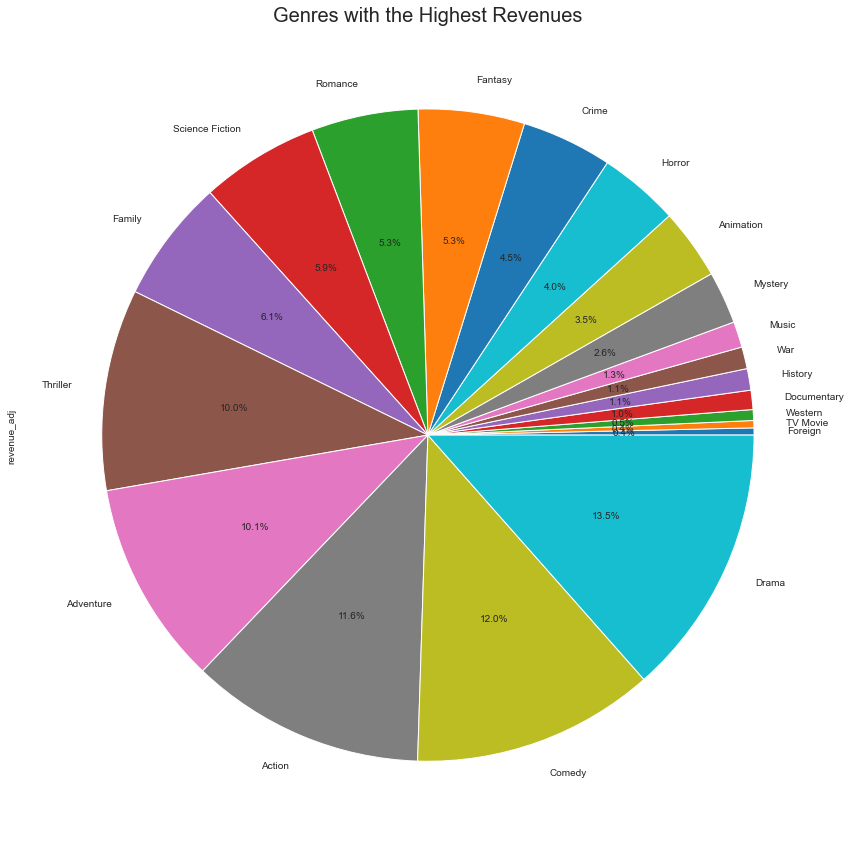

In [34]:
movies_merged.groupby('edGenres').revenue_adj.sum().sort_values().plot(kind= 'pie', figsize=(15, 15), autopct="%1.1f%%")
plt.title('Genres with the Highest Revenues', fontsize=20);

> According to the percentage mentioned in the above plot, Drama is the genre with the highest revenues, followed by Comedy. The five genres (Drama, Comedy, Action, Adventure and Thriller) appears to have quite close percentage as the most popular movie genres.

### Research Question 2:  (Have the number of movies produced annually changed from year to year?  -Have the average runtime of movies changed from year to year?)

To answer this question, we'll be using the independent variable **release_year** along with the dependent variable **imdb_id** as the total number of movies in each year, and with another dependent variable **runtime**:

In [35]:
movies_rt = movies.groupby('release_year').agg({'imdb_id':'count', 'runtime':'mean'}).reset_index()

In [36]:
def display(movies, title, xlabel, ylabel):
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

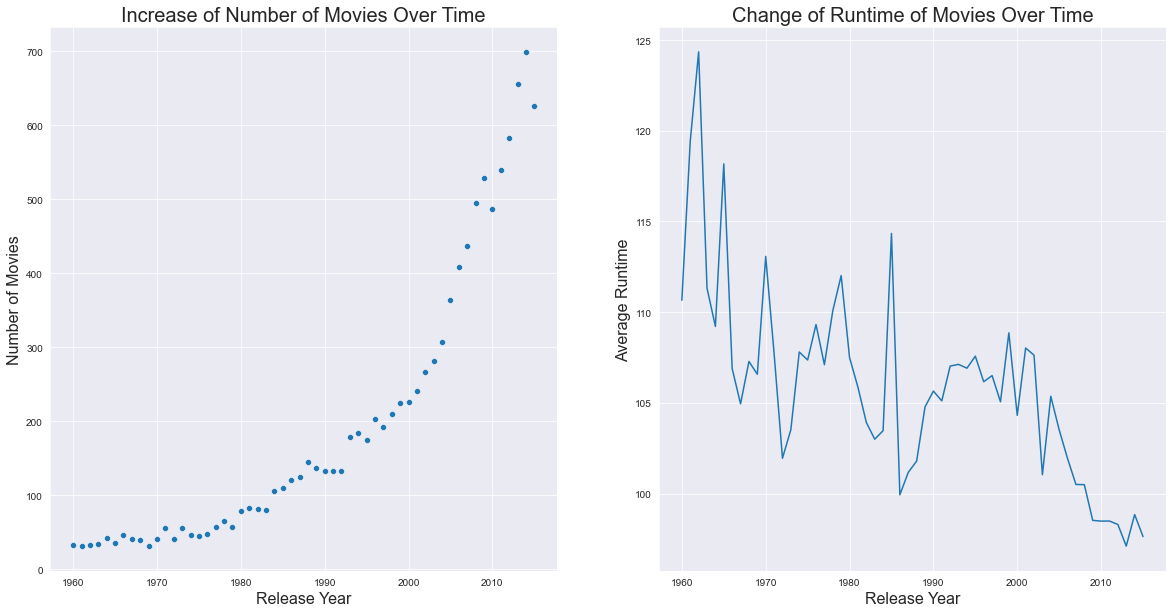

In [37]:
plt.figure(figsize=[20, 10])

plt.subplot(1, 2, 1)
sns.scatterplot(data=movies_rt, x='release_year', y='imdb_id')
display(movies, 'Increase of Number of Movies Over Time', 'Release Year', 'Number of Movies')

plt.subplot(1, 2, 2)
sns.lineplot(data=movies_rt, x='release_year', y='runtime')
display(movies, 'Change of Runtime of Movies Over Time', 'Release Year', 'Average Runtime')

> According to the above scatter plot, the annual number of movies produced increases from year to year.

> Based on the above line plot, the average runtime duration of movies decreases from year to year with average duration of 102 minutes.

### Research Question 4:  (Does the runtime affect the vote average?)

To answer this question, we need the average runtime duration of movies:

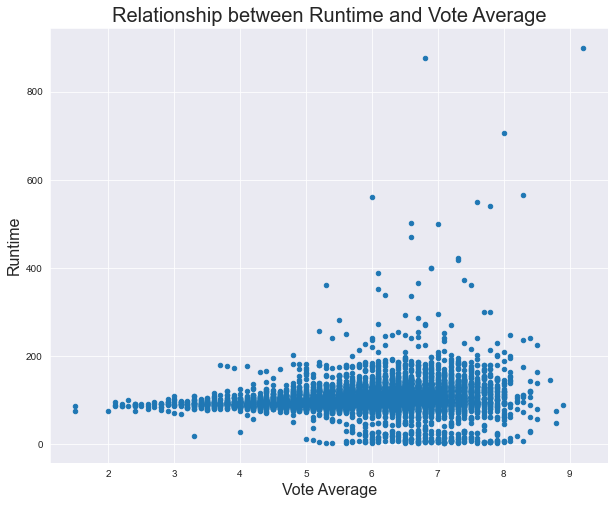

In [38]:
movies.groupby('runtime').mean()['vote_average'];

movies.plot(x='vote_average', y='runtime', kind='scatter', figsize=(10, 8), alpha=1);

display(movies, 'Relationship between Runtime and Vote Average', 'Vote Average', 'Runtime')

> According to the previous data, it seems that the runtime duration affects the vote average as people tends to give higher rating to movies whose average runtime duration is almost 102 minutes.

In [39]:
movies.shape

(10834, 7)

<a id='conclusions'></a>
## Conclusions

> Based on the EDA of the research questions, our findings are:
> - Drama is the genre with the highest revenues, followed by Comedy. The five genres (Drama, Comedy, Action, Adventure and Thriller) appears to have quite close percentage of revenues which make them the most popular movie genres.
> - The number of movies produced each year increases over time.
> - The average runtime duration of movies decreases from year to year with average duration of 102 minutes.
> - The duration of movies affects their ratings.
> - People tends to give higher rating to movies whose average runtime duration is around 102 minutes.


### Limitations

> During the cleaning data process, the following actions were applied to make the data analysis process easier:
> - Dropping unescessary columns which are not required for our analysis.
> - Removing the duplicated rows.
> - Dropping rows with missing values.
> - The analysis showed that some movies have a zero value in features of 
> - Replacing the movies' features (revenue, budget and runtime) which appeared to have a zero value with the mean of each.

> After the cleaning data process, the shape of our data changed from (10866 movies, 20 features) to (10834 movies, 7 features).